# Introduction
*The data set:-*

*1.deals with predicting amount of insurance claim*

*2.original details are removed(anonymized)but they have real world feature properties*



**Importing necessary libraries**

In [247]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor
import math


**Importing Data Files**

In [248]:
test = pd.read_csv(r"C:\Users\Abhishek Mehra\Desktop\Workspace\tabular-playground-series-feb-2021\test.csv")
train = pd.read_csv(r"C:\Users\Abhishek Mehra\Desktop\Workspace\tabular-playground-series-feb-2021\train.csv")

# Performing EDA

**Viewing the First Five Rows**

* `cat0` to `cat9` are categorical variable(10)
* `cont0` to `cont13` are continous variables(14)

In [249]:
pd.set_option("display.max_columns",None)
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,I,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,F,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,N,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,K,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,F,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [250]:
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,A,B,A,C,B,D,A,E,E,G,0.331261,0.551131,0.486284,0.156058,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,5,A,B,A,C,B,D,A,E,C,L,0.402404,0.617546,0.296852,0.187440,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,15,A,B,A,C,B,D,A,E,C,F,0.530677,0.618126,0.760865,0.199872,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,16,A,A,B,A,B,D,A,E,E,F,0.439653,0.487403,0.715786,0.192808,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,17,A,B,A,A,B,B,A,E,E,I,0.389844,0.752760,0.315269,0.191734,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


**Statistical summary of continuous features**



In [251]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166
max,499999.000000,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579,10.309208


**Summary of Categorical Features**

* 'cat6' in train dataset has 8 unique values 
* 'cat6' in test dataset has 7 unique values

In [252]:
train.describe(include=['O'])

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,2,2,4,4,4,8,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,281471,162678,276551,183752,297373,149208,292643,267631,121054,107281


In [253]:
#include'O' for objects/strings in the dataframe
test.describe(include=['O'])

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,2,2,2,4,4,4,7,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,187700,108047,184259,123185,198283,99662,195157,178335,80741,71623


**Data types of Features**

*No Null values in train and test datasets*

*String,int64 and float64 type datatype*

In [254]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cont0   200000 non-null  float64
 12  cont1   200000 non-null  float64
 13  cont2   200000 non-null  float64
 14  cont3   200000 non-null  float64
 15  cont4   200000 non-null  float64
 16  cont5   200000 non-null  float64
 17  cont6   200000 non-null  float64
 18  cont7   200000 non-null  float64
 19  cont8   200000 non-null  float64
 20  cont9   200000 non-null  float64
 21  cont10  20

In [255]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

**STORING CATEGORICAL AND CONTINOUS FEATURES IN (CAT AND CONT )VARIABLES**

*to work on categorical and continuos features separately*

In [264]:
# cat = [feature for feature in train.columns if 'cat' in feature]
cat = train.select_dtypes(include='O').columns.tolist()
print(cat)
# cont = [feature for feature in train.columns if 'cont' in feature]
cont = train.select_dtypes('float64').columns.tolist()
target=train.target
cont.remove('target')
print(cont)

['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']


# Visualizations

**Continuos feature Distribution**


*-train and test sets resemble each other*


**Displaying Train dataset**

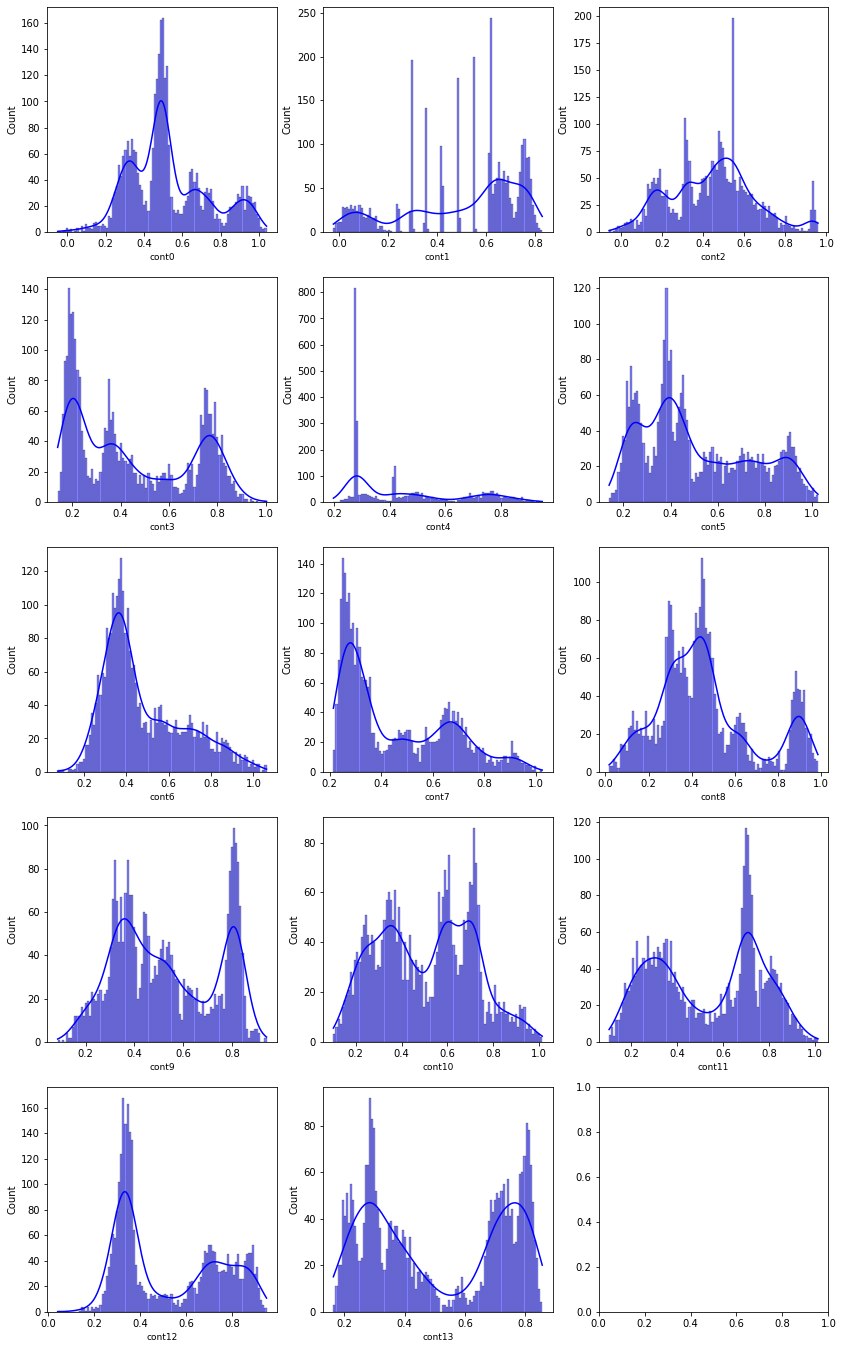

In [269]:
fig, ax = plt.subplots(5, 3, figsize=(14, 24))
#enumerate helps to keep track of iterable by a counter
for i, feature in enumerate(cont):
    plt.subplot(5, 3, i+1)
    sn.histplot(train[feature][::100], 
                 color="blue", 
                 kde=True, 
                 bins=100)
    plt.xlabel(feature, fontsize=9)
# plt.show()


**Displaying Test dataset**

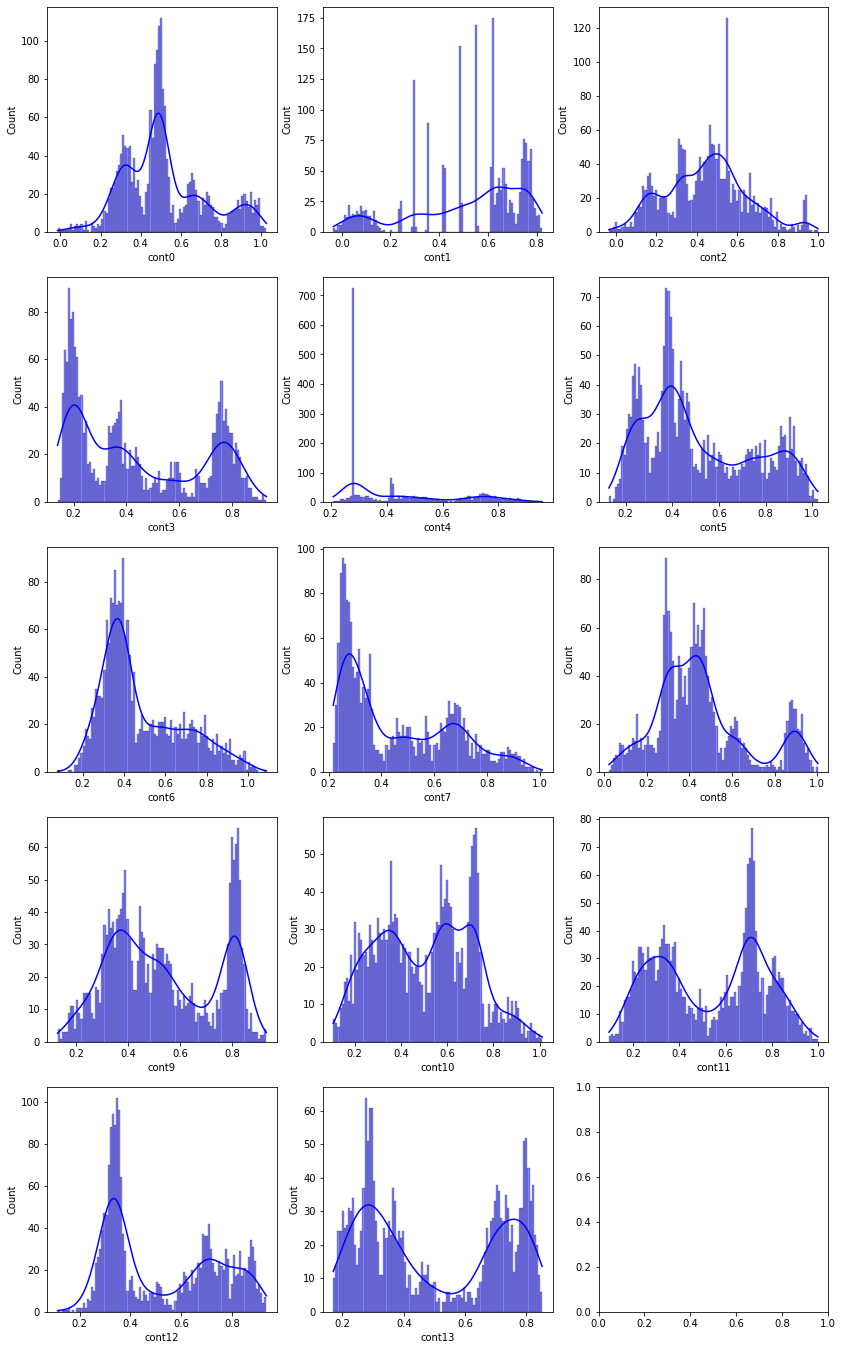

In [268]:
figu,axu = plt.subplots(5,3,figsize=(14,24))

for i,feature in enumerate(cont):
    plt.subplot(5,3,i+1)
    sn.histplot(test[feature][::100],kde=True,color='blue',bins=100)
    
plt.show()    

**Target Data is bi-modal**

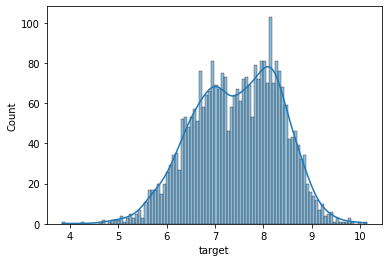

In [259]:
sn.histplot(train.target[::100],kde=True,bins=100)

**Categorical feature visualizations**

**Train dataset**

*train and test categorical variables have similar distribution except for cat 6 in test which has extra variable*

*cat 0,2,4,6,7- are dominated by on character ,hence does not provide variety. Later can be removed to see improvement in models accuracy*

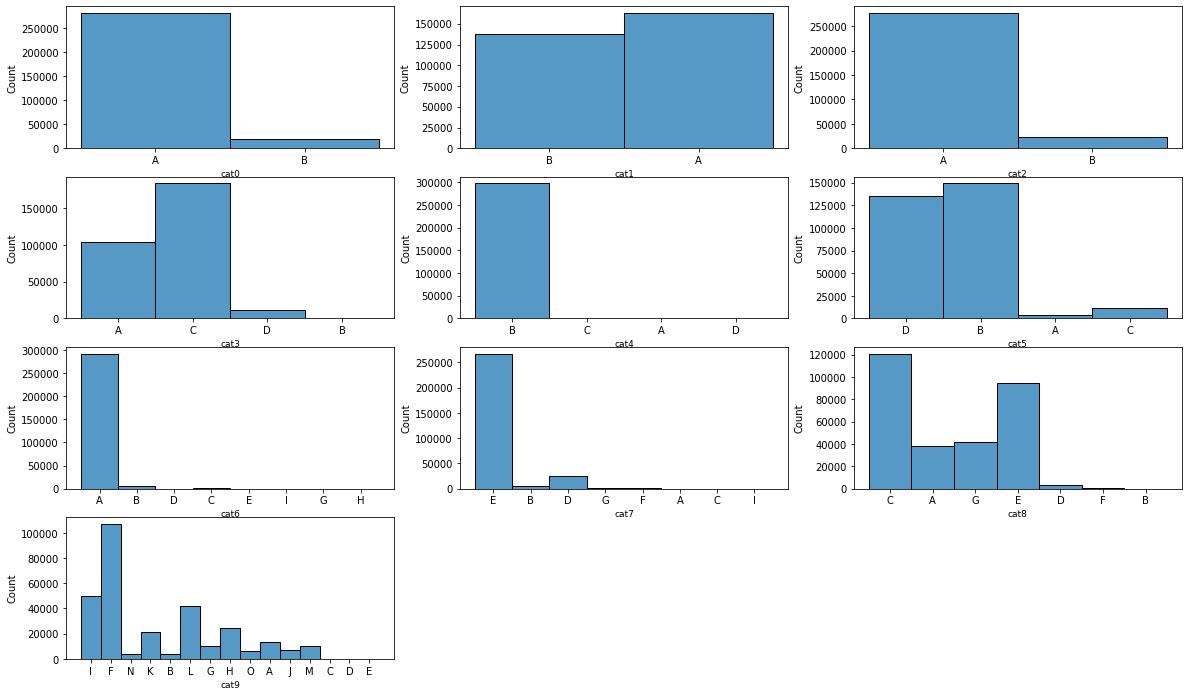

In [267]:


figur, axes = plt.subplots(3,4,figsize=(20,12))
for i,feature in enumerate(cat):
    plt.subplot(4,3,i+1)
    sn.histplot(train[feature])
    plt.xlabel(feature, fontsize=9)
    

plt.show() 

    
    

# Test Dataset

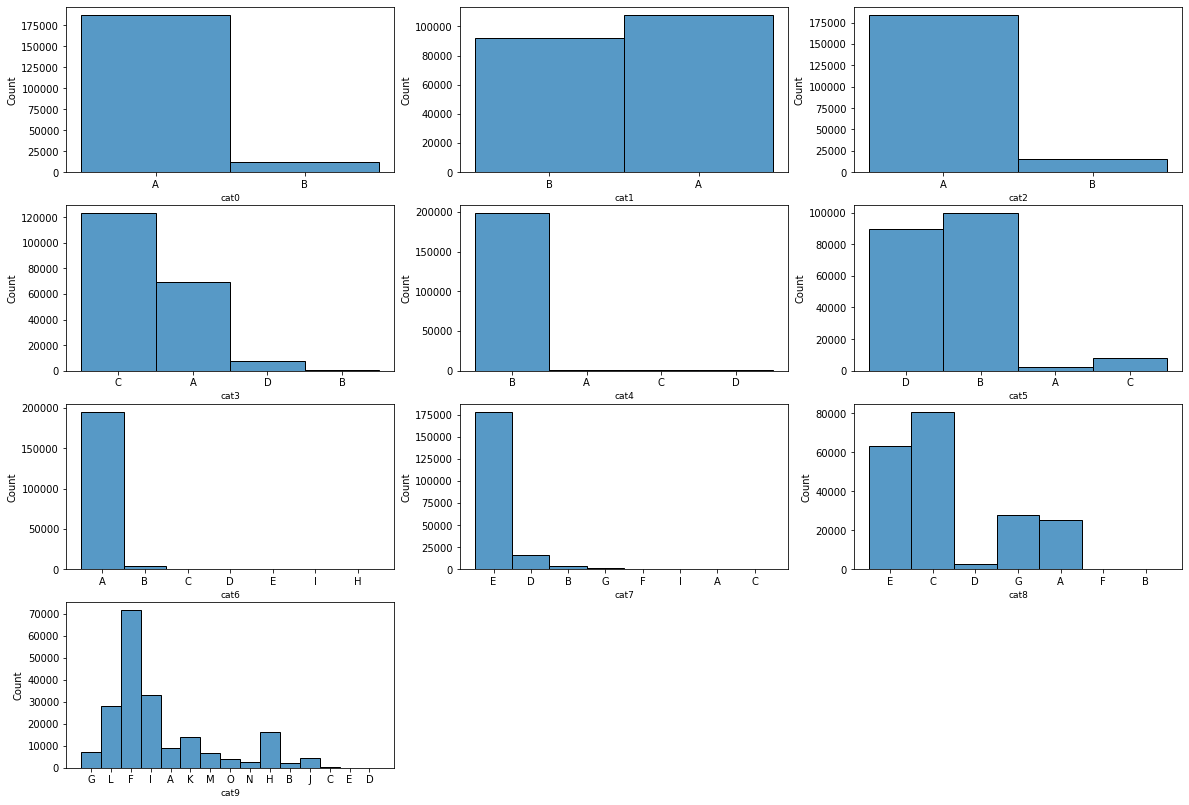

In [266]:
fig,ax = plt.subplots(3,4,figsize=(20,14))

for i,feature in enumerate(cat):
    plt.subplot(4,3,i+1)
    sn.histplot(test[feature])
    plt.xlabel(feature,fontsize=9)
plt.show()    


**Finding correlation between features.If two variables are highly correlated, one can be dropped since they are doing the same task**

Features are not correlated to each other.Maximum correlation between features is 0.6.Therefore no need to drop features

Feature have very low correlation with target.



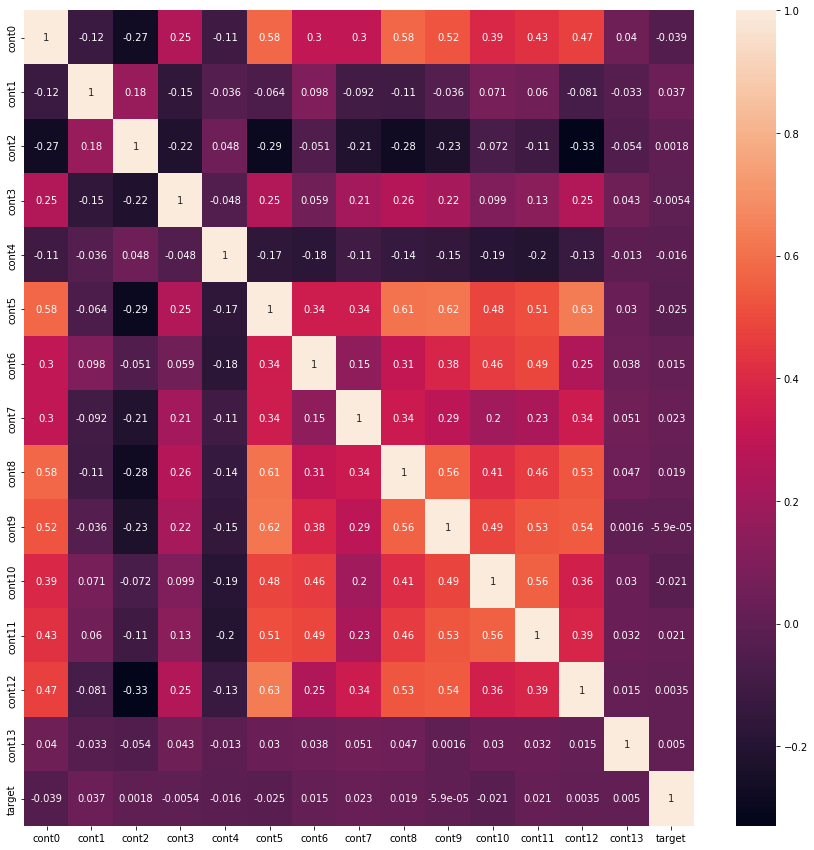

In [ ]:
cont.append('target')
fig,ax = plt.subplots(figsize=(15,15))
sn.heatmap(train[cont].corr(),annot=True)
cont.remove('target')

# Feature Engineering

*Label Encoding Categorical Features*

In [ ]:
# label_encoder = preprocessing.LabelEncoder()
# for feature in cat:
    
#     train[feature] = label_encoder.fit_transform(train[feature])
#     test[feature] = label_encoder.transform(test[feature])
    

*using get_dummies for encoding the categorical variables since data is nominal and not categorical*

In [270]:
#encoding categorical values in train
train_g=pd.get_dummies(train[cat])

#dropping  cat6_G from train. Test does not contain catg6_G
train_g.drop('cat6_G',axis=1,inplace=True)
print(train_g.columns)

#encoding categorical values in test
test_g=pd.get_dummies(test[cat])

#joining encoded labels with continuos columns
test_f = test[cont].join(test_g)
print(test_g.columns)

train_g.shape ,test_g.shape
print(test.shape,train.shape)


Index(['cat0_A', 'cat0_B', 'cat1_A', 'cat1_B', 'cat2_A', 'cat2_B', 'cat3_A',
       'cat3_B', 'cat3_C', 'cat3_D', 'cat4_A', 'cat4_B', 'cat4_C', 'cat4_D',
       'cat5_A', 'cat5_B', 'cat5_C', 'cat5_D', 'cat6_A', 'cat6_B', 'cat6_C',
       'cat6_D', 'cat6_E', 'cat6_H', 'cat6_I', 'cat7_A', 'cat7_B', 'cat7_C',
       'cat7_D', 'cat7_E', 'cat7_F', 'cat7_G', 'cat7_I', 'cat8_A', 'cat8_B',
       'cat8_C', 'cat8_D', 'cat8_E', 'cat8_F', 'cat8_G', 'cat9_A', 'cat9_B',
       'cat9_C', 'cat9_D', 'cat9_E', 'cat9_F', 'cat9_G', 'cat9_H', 'cat9_I',
       'cat9_J', 'cat9_K', 'cat9_L', 'cat9_M', 'cat9_N', 'cat9_O'],
      dtype='object')
Index(['cat0_A', 'cat0_B', 'cat1_A', 'cat1_B', 'cat2_A', 'cat2_B', 'cat3_A',
       'cat3_B', 'cat3_C', 'cat3_D', 'cat4_A', 'cat4_B', 'cat4_C', 'cat4_D',
       'cat5_A', 'cat5_B', 'cat5_C', 'cat5_D', 'cat6_A', 'cat6_B', 'cat6_C',
       'cat6_D', 'cat6_E', 'cat6_H', 'cat6_I', 'cat7_A', 'cat7_B', 'cat7_C',
       'cat7_D', 'cat7_E', 'cat7_F', 'cat7_G', 'cat7_I', 'cat8_

In [275]:


y=train.target
X= train[cont].join(train_g)
X.columns
X.shape,y.shape


((300000, 69), (300000,))

# Applying models


**Using Random Forest Regressor**

RandomForest uses multiple trees and takes average of all the results

In [273]:
#Splitting train data into two parts for cross validation.To measure performance of the model
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

random_forest= RandomForestRegressor(n_estimators=100,n_jobs=4,max_depth=5,random_state=0)

#fitting training data and prediction values for feedback in the model
random_forest.fit(X_train,y_train)


pred=random_forest.predict(X_test)
print(mean_absolute_error(pred,y_test))
print(math.sqrt(mean_squared_error(pred,y_test)))


0.7251978516963109
0.8685220222820503


**Using XGBRegressor**

XGB utilises a model and adds more models after calculating error and repeats the process

In [274]:
xg = XGBRegressor(n_estimators=300,max_depth=5,n_jobs=4,random_state=0)
xg.fit(X_train,y_train)
p=xg.predict(X_test)
print(mean_absolute_error(p,y_test))
print(math.sqrt(mean_squared_error(p,y_test)))

[10:38:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7074816928449118
0.8458202744226604


**Prediction of XGB results to a csv file**

In [ ]:
test.columns
predict=xg.predict(test_f)
output= pd.DataFrame({'id':test.id,'target':predict})
output.to_csv(r"C:\Users\Abhishek Mehra\Desktop\submission.csv",index=False)